# Getting started

In [1]:
import matplotlib.pyplot as plt
from typhon import plots

import konrad


plots.styles.use('typhon')

At the heart of each `konrad` simulation is the atmosphere component, which
represents the thermodynamical state of the model column.  In a first step, we
create a vertical (pressure) grid and initialize the atmosphere.  Internally,
`konrad` distinguishes full-levels (`plev`) and half-levels (`phlev`).  The
thermodynamic state and the atmospheric composition are defined for each
full-level.  Half-levels are used to consistently represent (radiative) fluxes
between full-levels. Therefore, the surface is also placed at the lowest
half-level.

In [2]:
plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

We can access the state variables in a dict-like way and, for example, plot the initial temperature profile.

Text(0, 0.5, '$p$ / hPa')

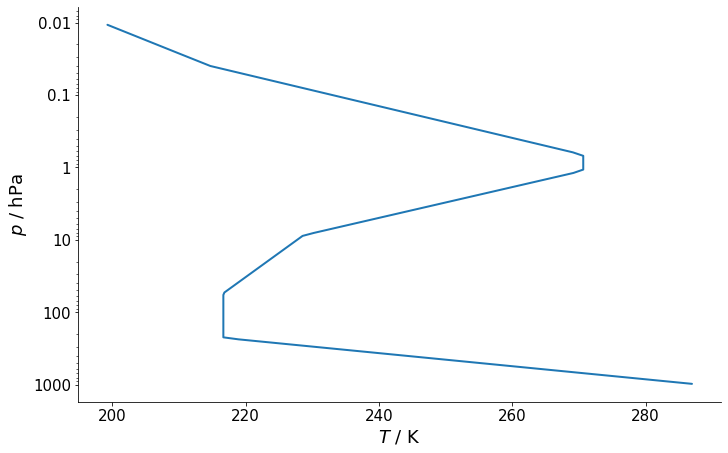

In [3]:
fig, ax = plt.subplots()
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :])
ax.set_xlabel(r"$T$ / K")
ax.set_ylabel("$p$ / hPa")

Next, we can compile the RCE object, which combines the different model component and allows the user to control the run.

In [4]:
# Initialize the setup for the radiative-convective equilibrium simulation.
rce = konrad.RCE(
    atmosphere,
    surface=konrad.surface.FixedTemperature(temperature=288.),  # Run with a fixed surface temperature.
    timestep='12h',  # Set timestep in model time.
    max_duration='100d',  # Set maximum runtime.
)

After defining our RCE model, we can perform the actual simulation

In [5]:
rce.run()  # Start the simulation.

Finally, we can plot the RCE state and compare it to the inital (standard) atmopshere

Text(0, 0.5, '$p$ / hPa')

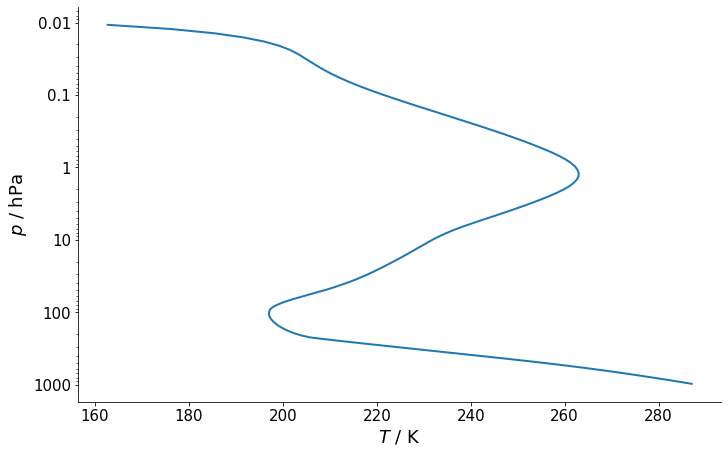

In [6]:
fig, ax = plt.subplots()
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :])
ax.set_xlabel(r"$T$ / K")
ax.set_ylabel("$p$ / hPa")